In [1]:
from StackAligner import StackAligner
from alignment_tools import align_stacks_itk
import SimpleITK as sitk
import numpy as np

In [6]:
def mutual_information(x,y):
    hgram, x_edges, y_edges = np.histogram2d(x.ravel(),y.ravel(),bins=20)
    # Convert bins counts to probability values
    pxy = hgram / float(np.sum(hgram))
    px = np.sum(pxy, axis=1) # marginal for x over y
    py = np.sum(pxy, axis=0) # marginal for y over x
    px_py = px[:, None] * py[None, :] # Broadcast to multiply marginals
    # Now we can do the calculation using the pxy, px_py 2D arrays
    nzs = pxy > 0 # Only non-zero pxy values contribute to the sum
    return np.sum(pxy[nzs] * np.log(pxy[nzs] / px_py[nzs]))

In [3]:
image_path = '/data/image_alignment/salglcinssalglcglc'
aligner = StackAligner(image_path)

In [8]:
mi = []
for tifi in range(aligner.ntifs):
    average_image = aligner.load_average_image()
    transformed = aligner.load_transformed_image(tifi)
    mi.append(mutual_information(transformed,average_image))


NameError: name 'plt' is not defined

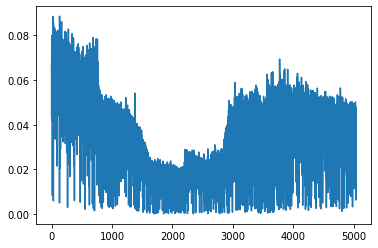

In [9]:
import matplotlib.pyplot as plt
plt.plot(mi)

In [6]:
tifi=800
moving = aligner.load_moving_image(tifi)
fixed = aligner.load_fixed_image()
transformation = align_stacks_itk(moving,fixed,verbose=False,initial=True)
save_path = aligner.get_tifi_transformation_path(0)


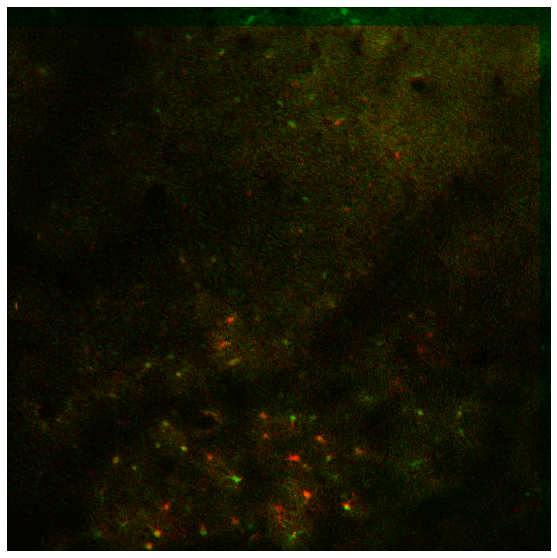

In [7]:
average_image = aligner.load_fixed_image()
tranformed = aligner.apply_transformation(fixed,moving,transformation)
aligner.compare_images(tranformed,fixed)

In [9]:
sitk.WriteTransform(transformation, save_path)

In [10]:
print(transformation)

itk::simple::Transform
 CompositeTransform (0x36c4f80)
   RTTI typeinfo:   itk::CompositeTransform<double, 3u>
   Reference Count: 1
   Modified Time: 313628
   Debug: Off
   Object Name: 
   Observers: 
     none
   Transforms in queue, from begin to end:
   >>>>>>>>>
   Euler3DTransform (0x36d8310)
     RTTI typeinfo:   itk::Euler3DTransform<double>
     Reference Count: 1
     Modified Time: 313469
     Debug: Off
     Object Name: 
     Observers: 
       none
     Matrix: 
       0.999995 0.00303304 -0.0012712 
       -0.00304079 0.999977 -0.00613676 
       0.00125255 0.0061406 0.99998 
     Offset: [-37.2232, 21.9405, -1.32391]
     Center: [511.5, 511.5, 6]
     Translation: [-35.6822, 20.3363, 2.45756]
     Inverse: 
       0.999995 -0.00304079 0.00125255 
       0.00303304 0.999977 0.0061406 
       -0.0012712 -0.00613676 0.99998 
     Singular: 0
     Euler's angles: AngleX=0.00614064 AngleY=-0.00125258 AngleZ=-0.0030331
     m_ComputeZYX = 0
   End of MultiTransform.
<<<<<<